### Prototyping the Analysis Pipeline for the [Stroke Risk Prediction]

# !!Note!! If "Shap" does not work use "!pip install shap" or without "!" to install it first

In [41]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import sklearn
import shap

# Dataset preperation

In [42]:
#Reading the csv file

df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.to_csv("healthcare-dataset-stroke-data.csv", index=False)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [43]:
#Renaming and refining the features

df = df.rename(columns={
                          "id":"ID",
                          "gender": "Sex",
                          "age": "Age",
                          "hypertension": "Hypertension",
                          "heart_disease": "Heart Disease",
                          "ever_married": "Ever Married?",
                          "work_type": "Work Type",
                          "Residence_type": "Residence Type",
                          "avg_glucose_level": "Avg Glucose Level",
                          "bmi": "BMI",
                          "smoking_status": "Smoking?",
                          "stroke": "Ever had a Stroke?"
                          })
df.head()

,ID,Sex,Age,Hypertension,Heart Disease,Ever Married?,Work Type,Residence Type,Avg Glucose Level,BMI,Smoking?,Ever had a Stroke?
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [44]:
#Changeing the feature "Ever had a Stroke?" to be Yes/No
df["Ever had a Stroke?"] = df["Ever had a Stroke?"].map({0: "No", 1: "Yes"})
df.head()

,ID,Sex,Age,Hypertension,Heart Disease,Ever Married?,Work Type,Residence Type,Avg Glucose Level,BMI,Smoking?,Ever had a Stroke?
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,Yes
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,Yes
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,Yes
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,Yes
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,Yes


# Take advantage of jupyter notebooks from previous courses! (DSHI?😉)

---

### Example of a simple pre-trained model from Scikit-learn

Training a logistic regression here, that can be loaded to make predictions on user input on the web dashboard.

Source: https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html


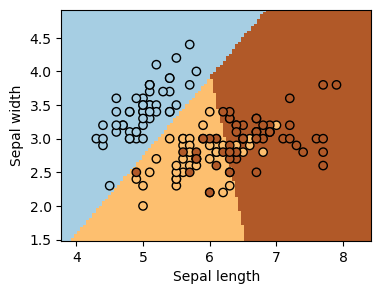

In [45]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import LogisticRegression

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(C=1e5)
logreg.fit(X, Y)

_, ax = plt.subplots(figsize=(4, 3))
DecisionBoundaryDisplay.from_estimator(
    logreg,
    X,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    xlabel="Sepal length",
    ylabel="Sepal width",
    eps=0.5,
)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors="k", cmap=plt.cm.Paired)
plt.show()

## Exporting a pretrained model

In the dashboard, you should load a pre-trained model that was designed and evaluated in the jupyter notebook. You can do it with `pickle` or any alternative for the same purpose.

In [46]:
import pickle

In [47]:
# Save in the `assets` folder so that it is accessible from the web dashboard
file_path = "../assets/trained_model.pickle"
data_to_save = logreg

# Creates a binary object and writes the indicated variables
with open(file_path, "wb") as writeFile:
    pickle.dump(data_to_save, writeFile)

In [48]:
# Load model
pre_trained_model_path = "../assets/trained_model.pickle"
loaded_model = None # This will be replaced by the trained model in the pickle 

with open(pre_trained_model_path, "rb") as readFile:
    loaded_model = pickle.load(readFile)

In [49]:
loaded_model

LogisticRegression(C=100000.0)

In [50]:
# Sepal [length, width]
user_data = [[5, 4]] # Must be 2D array
prediction = loaded_model.predict(user_data)

print(f"The predicted value for data {user_data} is {prediction}")

The predicted value for data [[5, 4]] is [0]
